<a href="https://colab.research.google.com/github/kridtapon/TSI-CCI-Fusion/blob/main/TSI_CCI_Fusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install vectorbt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.6/527.6 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.7 MB/s eta 0:00:00


In [ ]:
pip install --upgrade yfinance

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

# Function to calculate TSI (True Strength Index)
def calculate_tsi(close, long=25, short=13):
    momentum = close.diff()
    abs_momentum = momentum.abs()

    ema1 = momentum.ewm(span=short).mean()
    ema2 = ema1.ewm(span=long).mean()

    abs_ema1 = abs_momentum.ewm(span=short).mean()
    abs_ema2 = abs_ema1.ewm(span=long).mean()

    tsi = 100 * (ema2 / abs_ema2)
    return tsi

# Function to calculate CCI (Commodity Channel Index)
def calculate_cci(df, period=20):
    tp = (df['High'] + df['Low'] + df['Close']) / 3
    sma = tp.rolling(window=period).mean()
    mad = tp.rolling(window=period).apply(lambda x: np.fabs(x - x.mean()).mean())
    cci = (tp - sma) / (0.015 * mad)
    return cci

# Define the stock symbol and time period
symbol = 'META'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate indicators
df['TSI'] = calculate_tsi(df['Close'])
df['CCI'] = calculate_cci(df)

# Define Entry and Exit signals based on strategy:
df['Entry'] = (df['TSI'] > 0) & (df['CCI'] > -100)
df['Exit'] = (df['TSI'] < 0) & (df['CCI'] < 100)

# Filter data for the test period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001,
    slippage=0.002,
    freq='D'
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()


[*********************100%***********************]  1 of 1 completed


Start                                2020-01-02 00:00:00
End                                  2024-12-31 00:00:00
Period                                1258 days 00:00:00
Start Value                                     100000.0
End Value                                  323172.113703
Total Return [%]                              223.172114
Benchmark Return [%]                          180.172898
Max Gross Exposure [%]                             100.0
Total Fees Paid                              5953.201068
Max Drawdown [%]                               41.568579
Max Drawdown Duration                  640 days 00:00:00
Total Trades                                          19
Total Closed Trades                                   18
Total Open Trades                                      1
Open Trade PnL                              -4758.051966
Win Rate [%]                                   27.777778
Best Trade [%]                                128.126686
Worst Trade [%]                

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
<ipython-input-22-6bb40be26e3c>:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-6bb40be26e3c>:56: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-6bb40be26e3c>:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

✅ Best Parameters:
tsi_long        34.000000
tsi_short       19.000000
cci_period      10.000000
total_return     3.738635
Name: 3402, dtype: float64


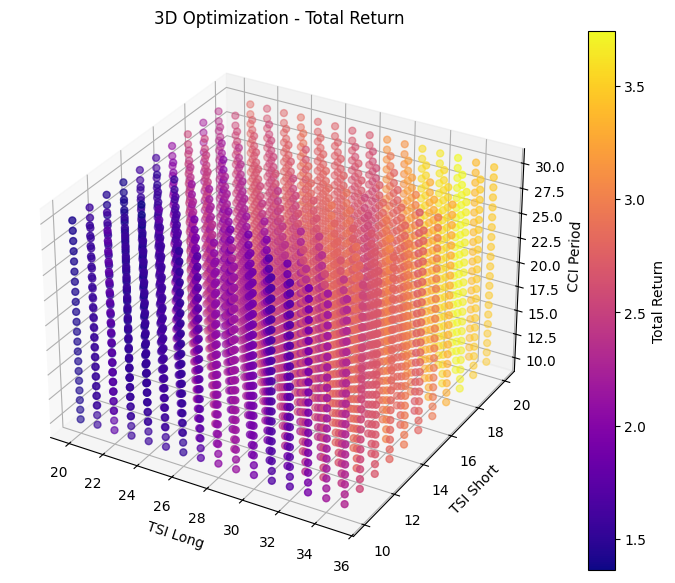

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# === Download data ===
symbol = 'META'
start_date = '2019-01-01'
end_date = '2025-01-01'

df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# === Indicator functions ===
def calculate_tsi(close, long, short):
    momentum = close.diff()
    abs_momentum = momentum.abs()

    ema1 = momentum.ewm(span=short).mean()
    ema2 = ema1.ewm(span=long).mean()

    abs_ema1 = abs_momentum.ewm(span=short).mean()
    abs_ema2 = abs_ema1.ewm(span=long).mean()

    tsi = 100 * (ema2 / abs_ema2)
    return tsi

def calculate_cci(df, period):
    tp = (df['High'] + df['Low'] + df['Close']) / 3
    sma = tp.rolling(window=period).mean()
    mad = tp.rolling(window=period).apply(lambda x: np.fabs(x - x.mean()).mean())
    cci = (tp - sma) / (0.015 * mad)
    return cci

# === Parameter grid ===
tsi_longs = range(20, 36)
tsi_shorts = range(10, 21)
cci_periods = range(10, 31)

results = []

# === Optimization loop ===
for tsi_long, tsi_short, cci_period in itertools.product(tsi_longs, tsi_shorts, cci_periods):
    if tsi_short >= tsi_long:
        continue  # skip invalid combinations

    df['TSI'] = calculate_tsi(df['Close'], tsi_long, tsi_short)
    df['CCI'] = calculate_cci(df, cci_period)

    test_df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

    # Signals
    test_df['Entry'] = (test_df['TSI'] > 0) & (test_df['CCI'] > -100)
    test_df['Exit'] = (test_df['TSI'] < 0) & (test_df['CCI'] < 100)

    portfolio = vbt.Portfolio.from_signals(
        close=test_df['Close'],
        entries=test_df['Entry'],
        exits=test_df['Exit'],
        init_cash=100_000,
        fees=0.001,
        slippage=0.002,
        freq='D'
    )

    total_return = portfolio.total_return()
    results.append({
        'tsi_long': tsi_long,
        'tsi_short': tsi_short,
        'cci_period': cci_period,
        'total_return': total_return
    })

# === Find best params ===
results_df = pd.DataFrame(results)
best_result = results_df.loc[results_df['total_return'].idxmax()]
print("✅ Best Parameters:")
print(best_result)

# === 3D Plot ===
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    results_df['tsi_long'],
    results_df['tsi_short'],
    results_df['cci_period'],
    c=results_df['total_return'],
    cmap='plasma',
    s=25
)

ax.set_xlabel('TSI Long')
ax.set_ylabel('TSI Short')
ax.set_zlabel('CCI Period')
plt.title('3D Optimization - Total Return')
plt.colorbar(ax.collections[0], label='Total Return')
plt.show()

In [ ]:
# Calculate indicators
df['TSI'] = calculate_tsi(df['Close'], long=34, short=19)
df['CCI'] = calculate_cci(df, period=10)

# Filter data for the test period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Define Entry and Exit signals based on strategy:
df['Entry'] = (df['TSI'] > 0) & (df['CCI'] > -100)
df['Exit'] = (df['TSI'] < 0) & (df['CCI'] < 100)

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001,
    slippage=0.002,
    freq='D'
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()

<ipython-input-23-1579c1f5ae37>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-1579c1f5ae37>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                         1258 days 00:00:00
Start Value                              100000.0
End Value                           473863.484717
Total Return [%]                       373.863485
Benchmark Return [%]                   180.172898
Max Gross Exposure [%]                      100.0
Total Fees Paid                       4053.527084
Max Drawdown [%]                        25.211778
Max Drawdown Duration           353 days 00:00:00
Total Trades                                   11
Total Closed Trades                            10
Total Open Trades                               1
Open Trade PnL                       55779.035008
Win Rate [%]                                 40.0
Best Trade [%]                         139.896852
Worst Trade [%]                         -9.702318
Avg Winning Trade [%]                   61.219028
Avg Losing Trade [%]                    -5.429723


[*********************100%***********************]  1 of 1 completed


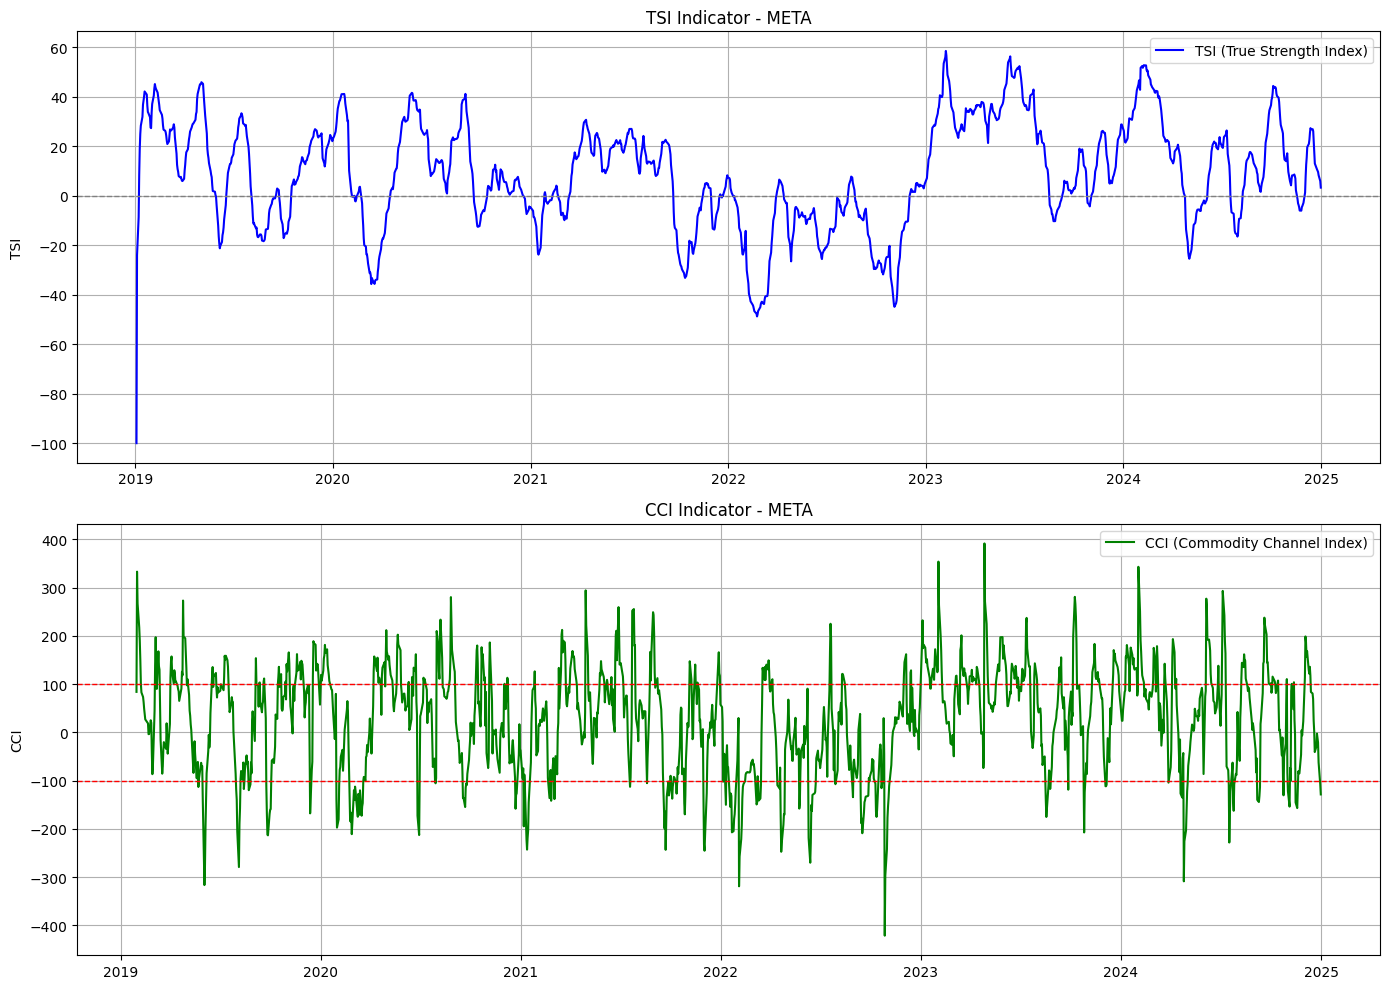

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate TSI (True Strength Index)
def calculate_tsi(close, long=25, short=13):
    momentum = close.diff()
    abs_momentum = momentum.abs()

    ema1 = momentum.ewm(span=short).mean()
    ema2 = ema1.ewm(span=long).mean()

    abs_ema1 = abs_momentum.ewm(span=short).mean()
    abs_ema2 = abs_ema1.ewm(span=long).mean()

    tsi = 100 * (ema2 / abs_ema2)
    return tsi

# Function to calculate CCI (Commodity Channel Index)
def calculate_cci(df, period=20):
    tp = (df['High'] + df['Low'] + df['Close']) / 3
    sma = tp.rolling(window=period).mean()
    mad = tp.rolling(window=period).apply(lambda x: np.fabs(x - x.mean()).mean())
    cci = (tp - sma) / (0.015 * mad)
    return cci

# Define the stock symbol and time period
symbol = 'META'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)

# Calculate indicators
df['TSI'] = calculate_tsi(df['Close'])
df['CCI'] = calculate_cci(df)

# Plotting
plt.figure(figsize=(14, 10))

# Plot TSI
plt.subplot(2, 1, 1)
plt.plot(df.index, df['TSI'], label='TSI (True Strength Index)', color='blue')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title(f'TSI Indicator - {symbol}')
plt.ylabel('TSI')
plt.legend()
plt.grid(True)

# Plot CCI
plt.subplot(2, 1, 2)
plt.plot(df.index, df['CCI'], label='CCI (Commodity Channel Index)', color='green')
plt.axhline(100, color='red', linestyle='--', linewidth=1)
plt.axhline(-100, color='red', linestyle='--', linewidth=1)
plt.title(f'CCI Indicator - {symbol}')
plt.ylabel('CCI')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
